In [1]:
import os
import sys
BACKTESTER_DIR = os.path.realpath(os.path.join(os.getcwd(), '..', '..'))
DATA_DIR = os.path.join(BACKTESTER_DIR, 'data')
OPTIONS_DATA = os.path.join(DATA_DIR, 'SPX_2017.csv')
STOCKS_DATA = os.path.join(DATA_DIR, 'portfolio_data_2017.csv')
sys.path.append(BACKTESTER_DIR) # Add backtester base dir to $PYTHONPATH

In [2]:
%config InlineBackend.figure_format="retina"
%matplotlib inline
import pyfolio as pf
import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (14, 8)

/Users/jrchatruc/anaconda3/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


We run here a backtest with one half of the capital distributed equally between VOO, TUR, RSX and VNQI symbols and the other half put in an [Iron Condor](https://www.investopedia.com/terms/i/ironcondor.asp) strategy.

In [3]:
from backtester.datahandler import HistoricalOptionsData, TiingoData
from backtester.strategy import Strategy, StrategyLeg
from backtester import Backtest, Stock, Type, Direction

In [4]:
stocks_data = TiingoData(STOCKS_DATA)
stocks = [Stock('VOO', 0.25), Stock('TUR', 0.25), Stock('RSX', 0.25), Stock('VNQI', 0.25)]

In [5]:
options_data = HistoricalOptionsData(OPTIONS_DATA)
schema = options_data.schema

In [16]:
# Iron Condor
iron_condor = Strategy(schema)

leg1 = StrategyLeg("leg_1", schema, option_type=Type.PUT, direction=Direction.BUY)
leg1.entry_filter = (schema.underlying == "SPX") & (schema.dte >= 35) & (schema.dte <= 60) & (schema.strike <= 0.85 * schema.underlying_last)
leg1.exit_filter = (schema.dte <= 35)

leg2 = StrategyLeg("leg_2", schema, option_type=Type.PUT, direction=Direction.SELL)
leg2.entry_filter = (schema.underlying == "SPX") & (schema.dte >= 35) & (schema.dte <= 60) & (schema.strike >= 0.90 * schema.underlying_last) & (schema.strike <= schema.underlying_last)
leg2.exit_filter = (schema.dte <= 35)

leg3 = StrategyLeg("leg_3", schema, option_type=Type.CALL, direction=Direction.SELL)
leg3.entry_filter = (schema.underlying == "SPX") & (schema.dte >= 35) & (schema.dte <= 60) & (schema.strike >= schema.underlying_last) & (schema.strike <= 1.10 * schema.underlying_last)
leg3.exit_filter = (schema.dte <= 35)

leg4 = StrategyLeg("leg_4", schema, option_type=Type.PUT, direction=Direction.BUY)
leg4.entry_filter = (schema.underlying == "SPX") & (schema.dte >= 35) & (schema.dte <= 60) & (schema.strike >= 1.15 * schema.underlying_last)
leg4.exit_filter = (schema.dte <= 35)


iron_condor.add_legs([leg1, leg2, leg3, leg4]);

In [17]:
allocation = {'stocks': 0.5, 'options': 0.5, 'cash': 0.0}

In [18]:
bt = Backtest(allocation)
bt.stocks_data = stocks_data
bt.stocks = stocks
bt.options_strategy = iron_condor
bt.options_data = options_data

In [19]:
bt.run(rebalance_freq=1)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:06


leg_1                                                     \
              contract underlying expiration type strike  cost      order   
0   SPX170217P00500000        SPX 2017-02-17  put    500  10.0  Order.BTO   
1   SPX170217P00500000        SPX 2017-02-17  put    500  -0.0  Order.STC   
2   SPX170317P00300000        SPX 2017-03-17  put    300   5.0  Order.BTO   
3   SPX170317P00300000        SPX 2017-03-17  put    300  -0.0  Order.STC   
4   SPX170421P00500000        SPX 2017-04-21  put    500  25.0  Order.BTO   
5   SPX170421P00500000        SPX 2017-04-21  put    500  -0.0  Order.STC   
6   SPX170519P01000000        SPX 2017-05-19  put   1000  15.0  Order.BTO   
7   SPX170519P01000000        SPX 2017-05-19  put   1000  -0.0  Order.STC   
8   SPX170616P00300000        SPX 2017-06-16  put    300   5.0  Order.BTO   
9   SPX170616P00300000        SPX 2017-06-16  put    300  -0.0  Order.STC   
10  SPX170721P01000000        SPX 2017-07-21  put   1000  10.0  Order.BTO   
11  SPX170721P01000000        SPX 2017-07-21  put   1000  -0.0  Order.STC   
12  SPX170818P01000000        SPX 2017-08-18  put   1000  15.0  Order.BTO   
13  SPX170818P01000000        SPX 2017-08-18  put   1000  -0.0  Order.STC   
14  SPX170915P00300000        SPX 2017-09-15  put    300   5.0  Order.BTO   
15  SPX170915P00300000        SPX 2017-09-15  put    300  -0.0  Order.STC   
16  SPX171020P01000000        SPX 2017-10-20  put   1000  10.0  Order.BTO   
17  SPX171020P01000000        SPX 2017-10-20  put   1000  -0.0  Order.STC   
18  SPX171117P01000000        SPX 2017-11-17  put   1000  10.0  Order.BTO   
19  SPX171117P01000000        SPX 2017-11-17  put   1000  -0.0  Order.STC   
20  SPX171215P00100000        SPX 2017-12-15  put    100   5.0  Order.BTO   
21  SPX171215P00100000        SPX 2017-12-15  put    100  -0.0  Order.STC   
22  SPX180119P00100000        SPX 2018-01-19  put    100  10.0  Order.BTO   

                 leg_2                        ...               leg_4  \
              contract underlying expiration  ...            contract   
0   SPX170217P02040000        SPX 2017-02-17  ...  SPX170217P02600000   
1   SPX170217P02040000        SPX 2017-02-17  ...  SPX170217P02600000   
2   SPX170317P02055000        SPX 2017-03-17  ...  SPX170317P02700000   
3   SPX170317P02055000        SPX 2017-03-17  ...  SPX170317P02700000   
4   SPX170421P02160000        SPX 2017-04-21  ...  SPX170421P02800000   
5   SPX170421P02160000        SPX 2017-04-21  ...  SPX170421P02800000   
6   SPX170519P02125000        SPX 2017-05-19  ...  SPX170519P02800000   
7   SPX170519P02125000        SPX 2017-05-19  ...  SPX170519P02800000   
8   SPX170616P02150000        SPX 2017-06-16  ...  SPX170616P02750000   
9   SPX170616P02150000        SPX 2017-06-16  ...  SPX170616P02750000   
10  SPX170721P02190000        SPX 2017-07-21  ...  SPX170721P02800000   
11  SPX170721P02190000        SPX 2017-07-21  ...  SPX170721P02800000   
12  SPX170818P02190000        SPX 2017-08-18  ...  SPX170818P02800000   
13  SPX170818P02190000        SPX 2017-08-18  ...  SPX170818P02800000   
14  SPX170915P02230000        SPX 2017-09-15  ...  SPX170915P02850000   
15  SPX170915P02230000        SPX 2017-09-15  ...  SPX170915P02850000   
16  SPX171020P02230000        SPX 2017-10-20  ...  SPX171020P02900000   
17  SPX171020P02230000        SPX 2017-10-20  ...  SPX171020P02900000   
18  SPX171117P02280000        SPX 2017-11-17  ...  SPX171117P03000000   
19  SPX171117P02280000        SPX 2017-11-17  ...  SPX171117P03000000   
20  SPX171215P02325000        SPX 2017-12-15  ...  SPX171215P03000000   
21  SPX171215P02325000        SPX 2017-12-15  ...  SPX171215P03000000   
22  SPX180119P02380000        SPX 2018-01-19  ...  SPX180119P03100000   

                                                            totals        \
   underlying expiration type  strike     cost      order     cost   qty   
0         SPX 2017-02-17  put  2600.0  34690.0  Order.BTO  31210.0  16.0   
1         SPX 2017-02-17  put  2600.0

In [20]:
bt.balance

,total capital,cash,VOO,TUR,RSX,VNQI,options qty,calls capital,puts capital,stocks qty,options capital,stocks capital,% change,accumulated return
2017-01-02,1000000.000000,1000000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN
2017-01-03,988800.000000,720.999457,124993.601257,124983.202918,124983.949028,124958.247341,16.0,-52960.0,541120.0,14676.0,488160.0,499919.000543,-0.011200,0.988800
2017-01-04,969159.970260,720.999457,125731.204979,125182.157395,125793.280798,126612.327631,16.0,-59520.0,524640.0,14676.0,465120.0,503318.970803,-0.019862,0.969160
2017-01-05,973209.378348,720.999457,125634.470064,124664.875753,125272.996089,128116.036985,16.0,-57280.0,526080.0,14676.0,468800.0,503688.378891,0.004178,0.973209
2017-01-06,948753.130795,720.999457,126124.190569,123431.357991,124405.854907,127990.727872,16.0,-65600.0,511680.0,14676.0,446080.0,501952.131338,-0.025129,0.948753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,458612.628343,34381.436014,61456.667813,66326.718493,61182.633273,61065.172751,5.0,-28350.0,202550.0,6394.0,174200.0,250031.192329,-0.010616,0.458613
2017-12-22,462550.344623,34381.436014,61444.230213,66708.089179,62034.840941,61456.748276,5.0,-27250.0,203775.0,6394.0,176525.0,251643.908609,0.008586,0.462550
2017-12-26,463668.347026,34381.436014,61373.062268,67041.788529,62622.570367,61549.489848,5.0,-27050.0,203750.0,6394.0,176700.0,252586.911012,0.002417,0.463668
2017-12-27,464044.869030,34381.436014,61408.055461,66898.774522,62299.319183,61982.283850,5.0,-26850.0,203925.0,6394.0,177075.0,252588.433016,0.000812,0.464045


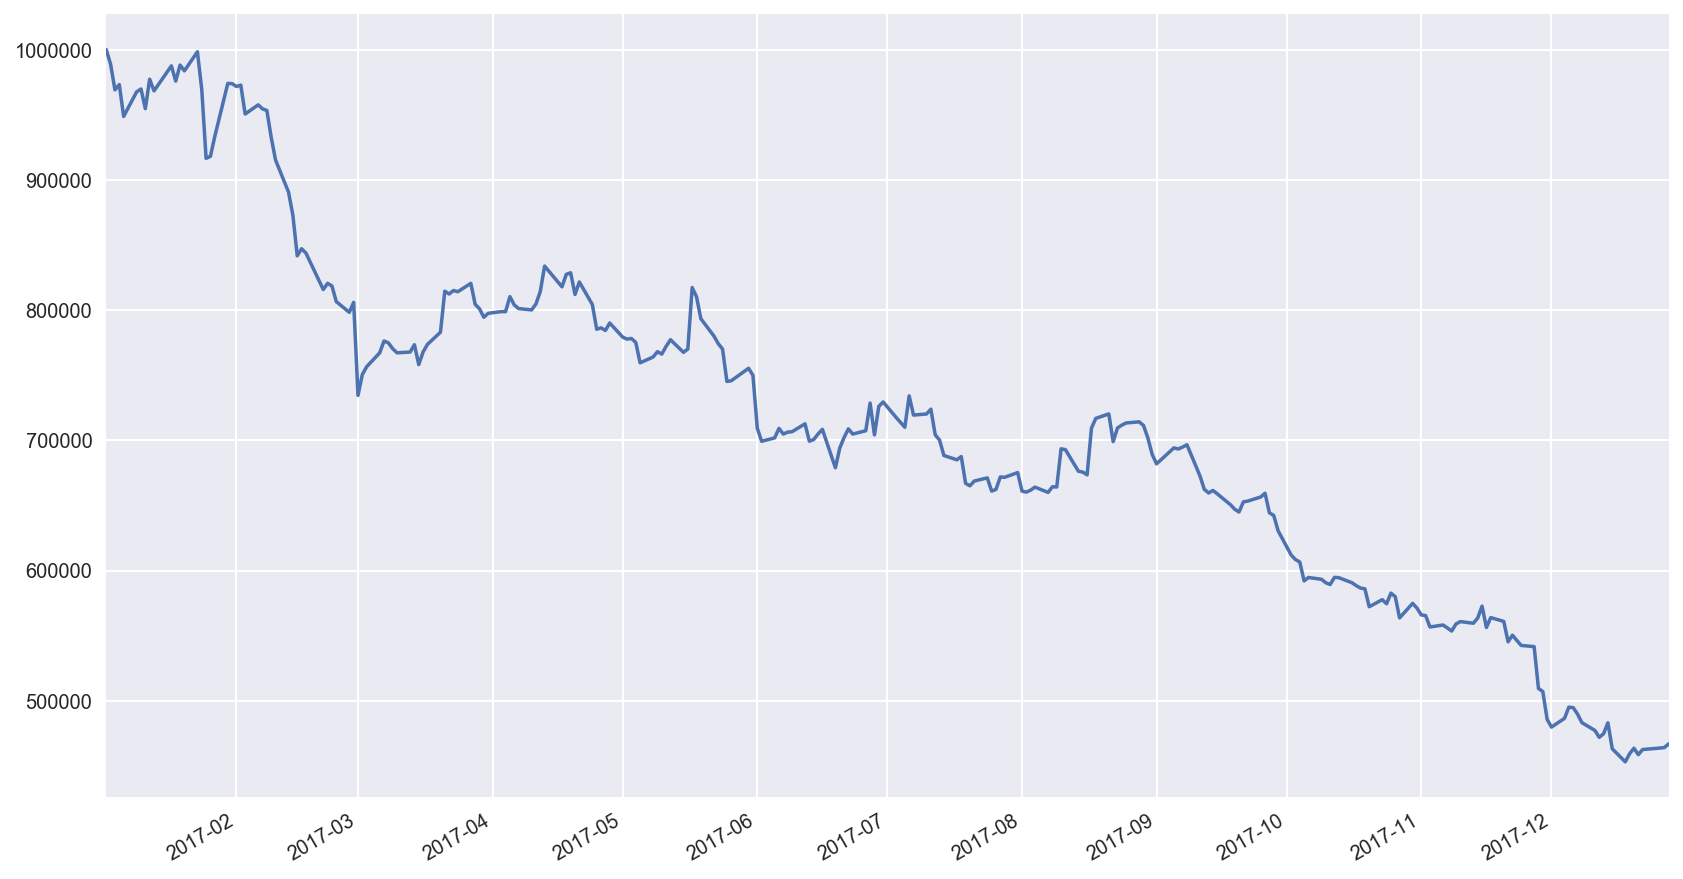

In [21]:
bt.balance['total capital'].plot();

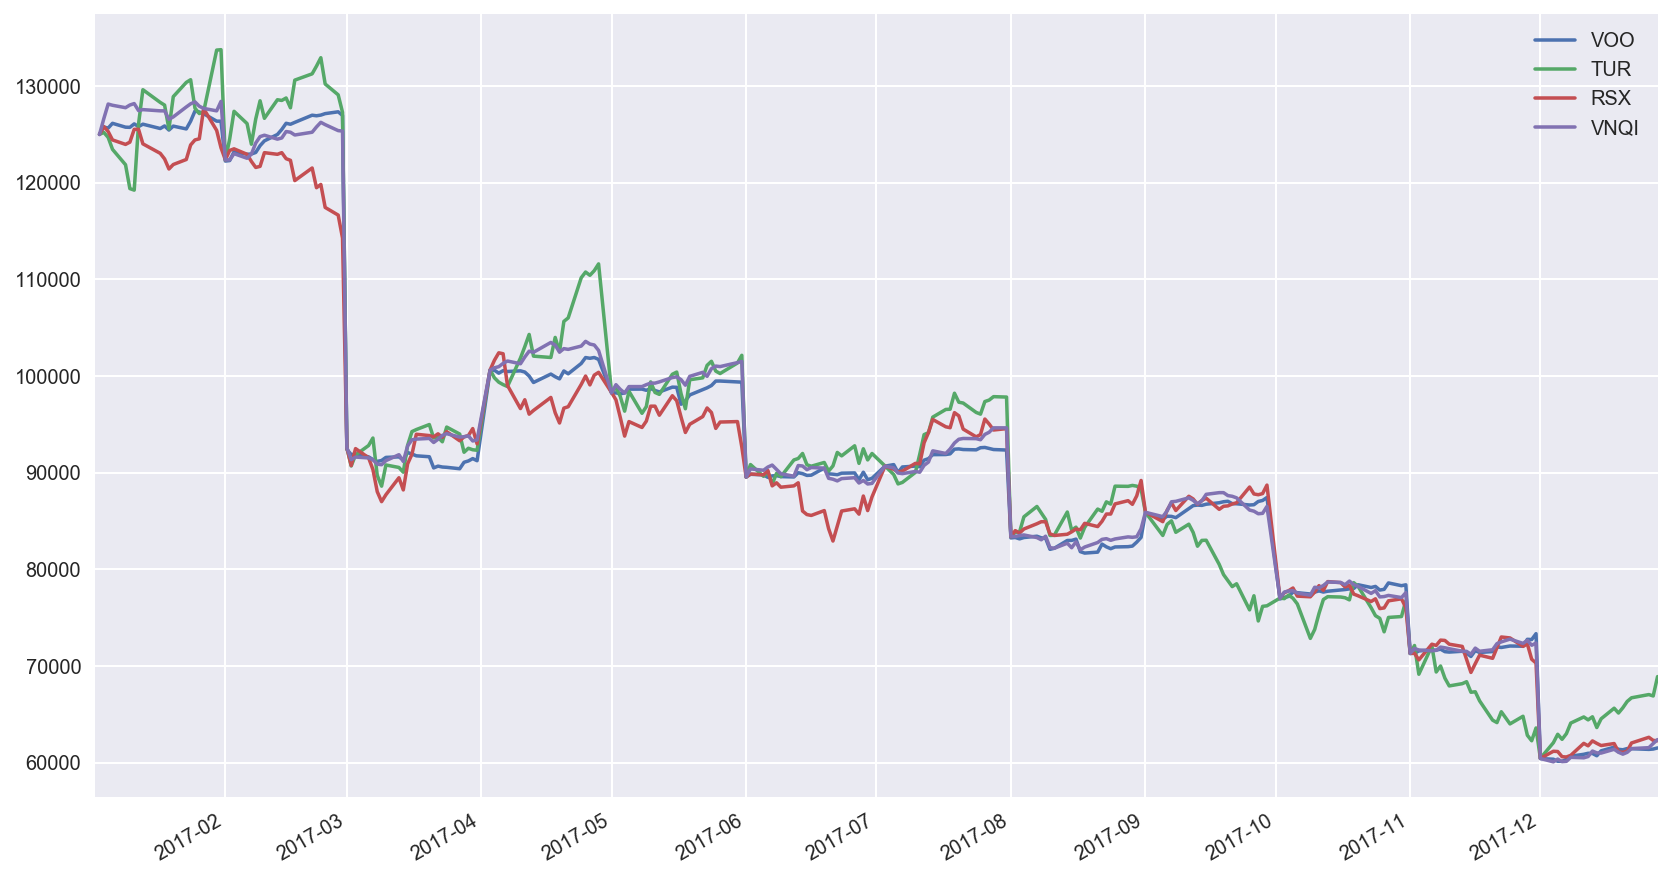

In [22]:
bt.balance[[stock.symbol for stock in stocks]].plot();

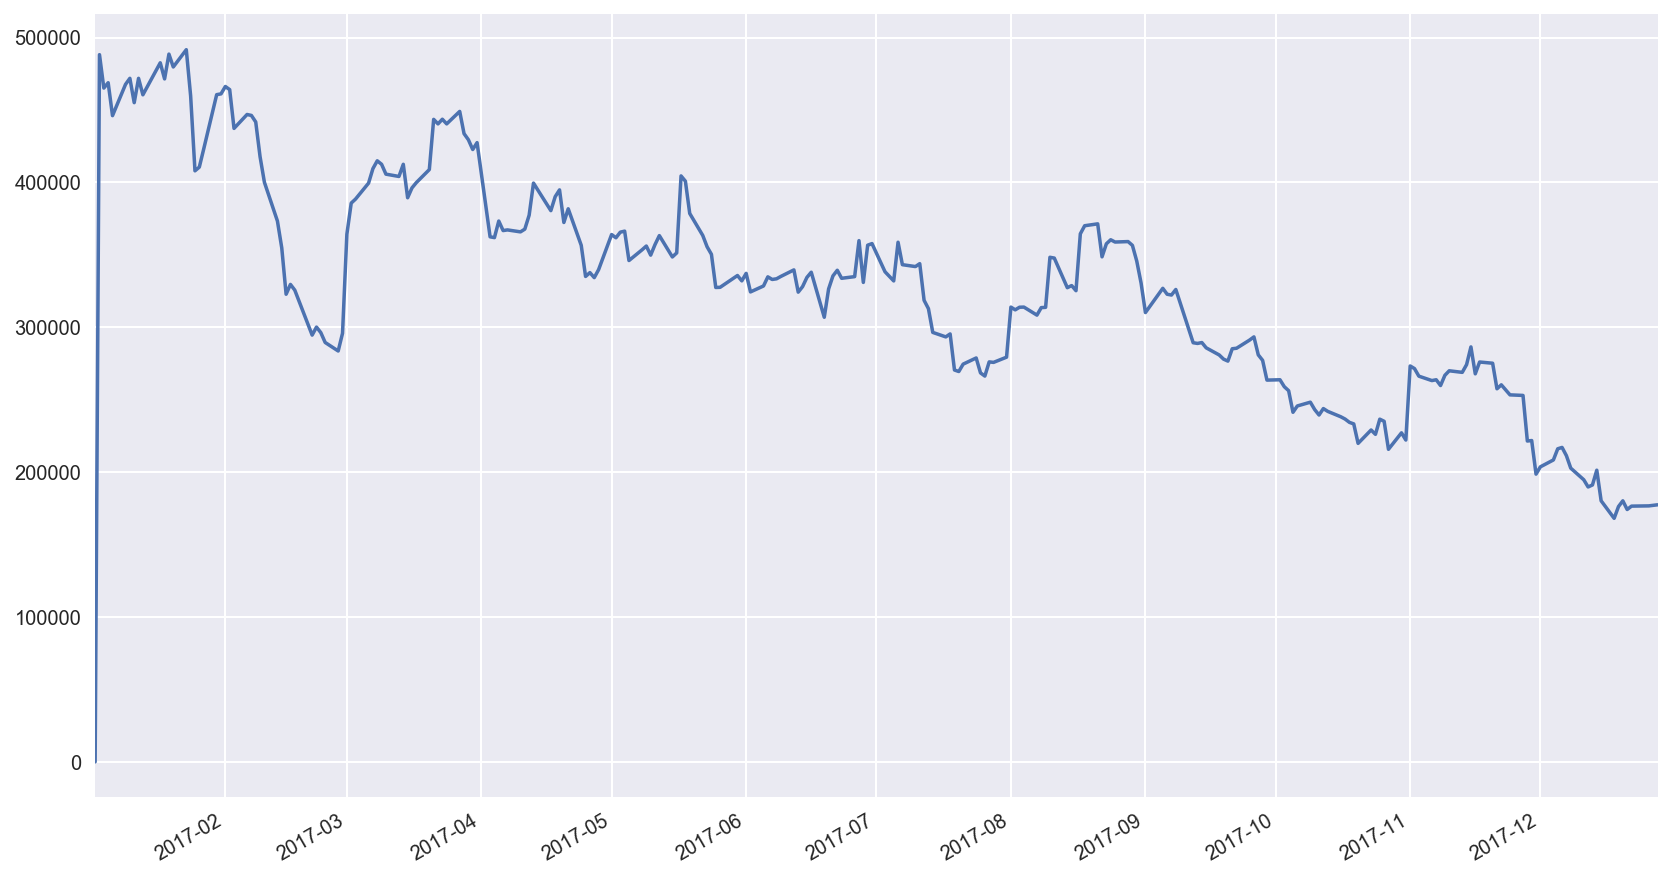

In [23]:
bt.balance['options capital'].plot();

Start date,2017-01-03
End date,2017-12-28
Total months,11
,Backtest
Annual return,-53.6%
Cumulative returns,-53.3%
Annual volatility,27.6%
Sharpe ratio,-2.64
Calmar ratio,-0.98
Stability,0.91
Max drawdown,-54.7%


/Users/jrchatruc/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,54.62,2017-01-23,2017-12-18,NaT,NaN
1,4.05,2017-01-03,2017-01-06,2017-01-23,15
2,0.00,2017-01-03,2017-01-03,2017-01-03,1
3,0.00,2017-01-03,2017-01-03,2017-01-03,1
4,0.00,2017-01-03,2017-01-03,2017-01-03,1


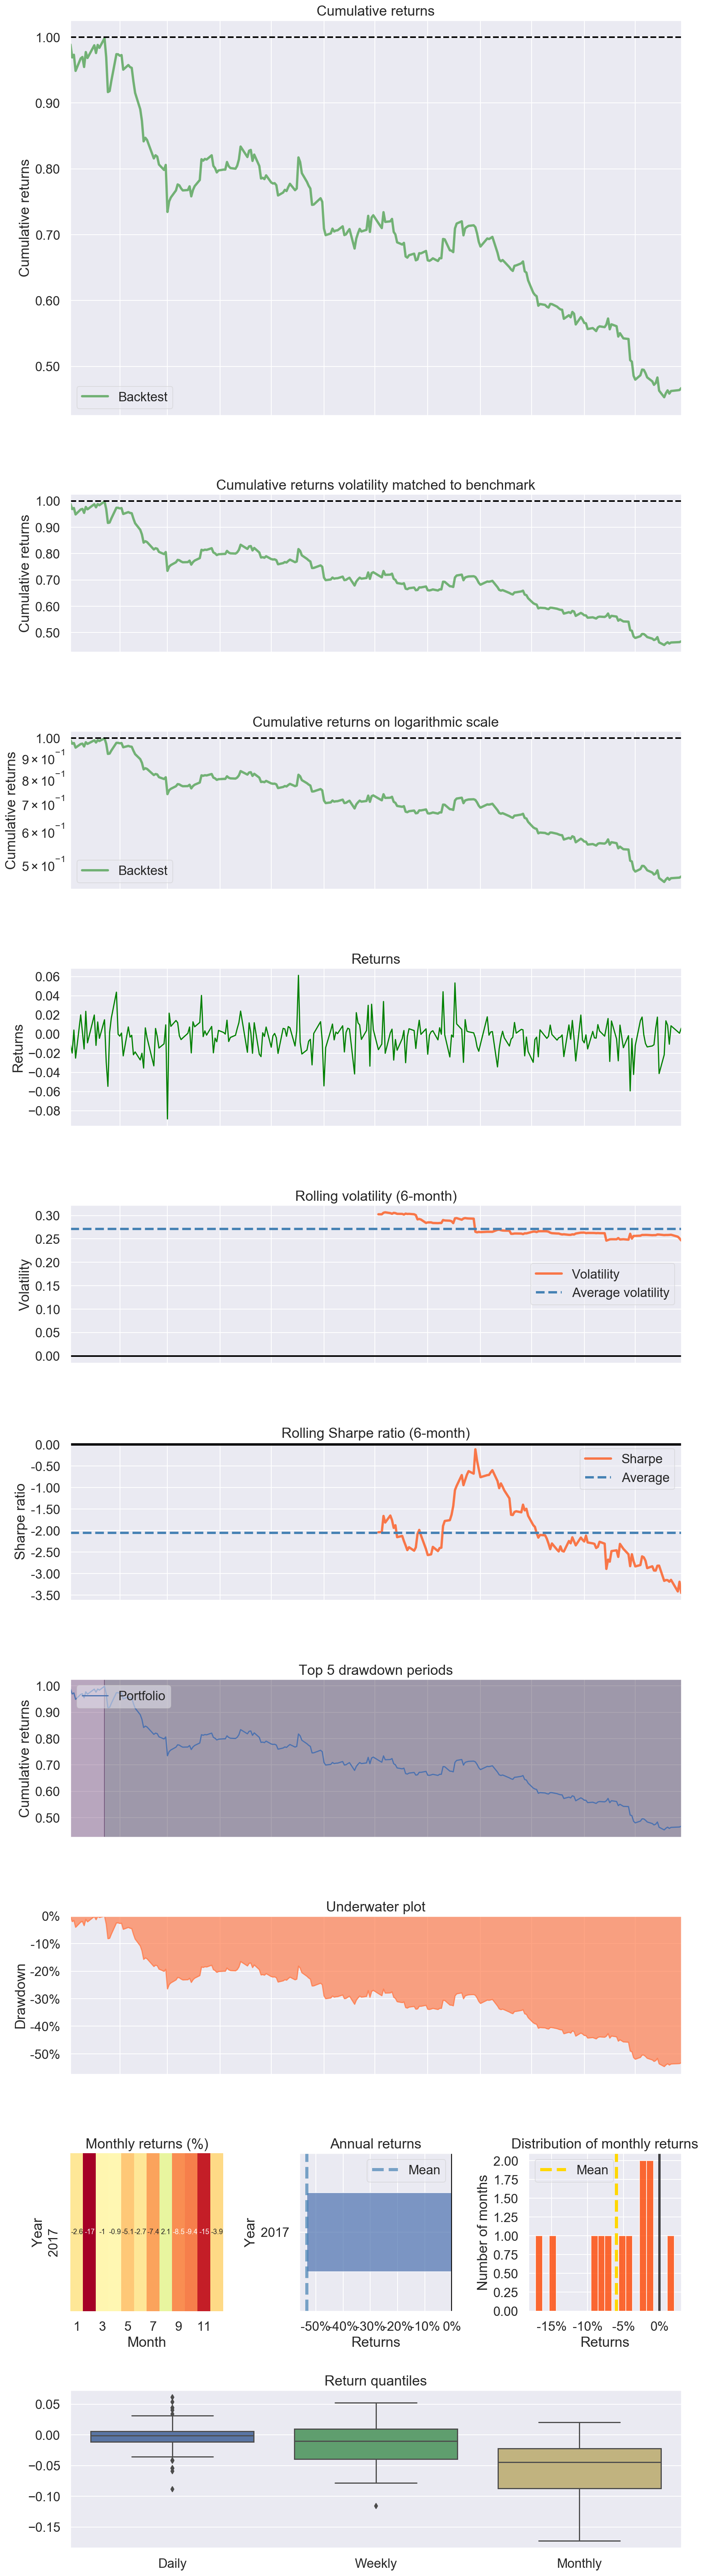

In [24]:
pf.create_returns_tear_sheet(returns = bt.balance['% change'].dropna())